In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [5]:
df=pd.read_csv('/home/ignis/Downloads/iris(For PCA Program).csv')
df.head()

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [6]:
df.tail()


,sepal length,sepal width,petal length,petal width,species
145,6.7,3.0,5.2,2.3,3
146,6.3,2.5,5.0,1.9,3
147,6.5,3.0,5.2,2.0,3
148,6.2,3.4,5.4,2.3,3
149,5.9,3.0,5.1,1.8,3


In [14]:
X = df.drop(['species'],axis=1)

X_scaled = StandardScaler().fit_transform(X)
X_scaled[:5]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ]])

In [15]:
y=df['species']

In [16]:
features = X_scaled.T
cov_matrix = np.cov(features)
cov_matrix[:5]

array([[ 1.00671141, -0.11835884,  0.87760447,  0.82343066],
       [-0.11835884,  1.00671141, -0.43131554, -0.36858315],
       [ 0.87760447, -0.43131554,  1.00671141,  0.96932762],
       [ 0.82343066, -0.36858315,  0.96932762,  1.00671141]])

In [17]:
values, vectors = np.linalg.eig(cov_matrix)
values[:5]

array([2.93808505, 0.9201649 , 0.14774182, 0.02085386])

In [18]:
vectors[:5]

array([[ 0.52106591, -0.37741762, -0.71956635,  0.26128628],
       [-0.26934744, -0.92329566,  0.24438178, -0.12350962],
       [ 0.5804131 , -0.02449161,  0.14212637, -0.80144925],
       [ 0.56485654, -0.06694199,  0.63427274,  0.52359713]])

In [20]:
explained_variances = []
for i in range(len(values)):
    explained_variances.append((values[i] / np.sum(values))*100)

In [21]:
print("variances of each feature",explained_variances)

variances of each feature [72.9624454132999, 22.850761786701725, 3.668921889282867, 0.5178709107155016]


Text(0.5, 0, 'Dimensions')

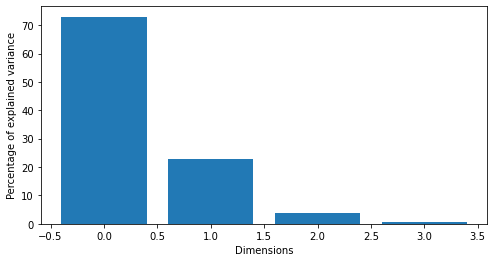

In [28]:
plt.figure(figsize=(8,4))
plt.bar(range(4),explained_variances, alpha=0.99)
plt.ylabel('Percentage of explained variance')
plt.xlabel('Dimensions')

In [23]:
projected_1 = X_scaled.dot(vectors.T[0])
projected_2 = X_scaled.dot(vectors.T[1])
res = pd.DataFrame(projected_1, columns=['PC1'])
res['PC2'] = projected_2
res['Y'] = y
res.head()

,PC1,PC2,Y
0,-2.264703,-0.480027,1
1,-2.080961,0.674134,1
2,-2.364229,0.341908,1
3,-2.299384,0.597395,1
4,-2.389842,-0.646835,1


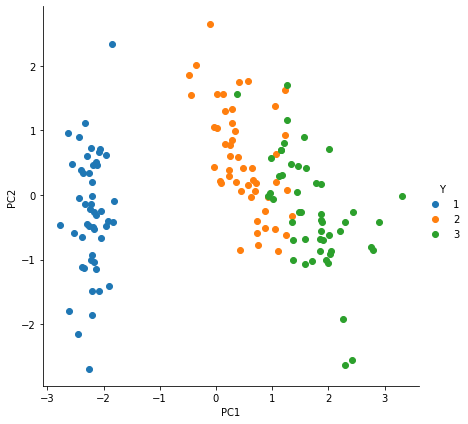

In [29]:
sns.FacetGrid(res, hue="Y", height=6).map(plt.scatter, 'PC1', 'PC2').add_legend()
plt.show()